In [1]:
# Used libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree


# Jupyter configs
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# The Seen/Unseen split (aka the Test split)

In [2]:
df = pd.read_csv('mushrooms.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print('Train size:', df_train.shape)
print('Test size:', df_test.shape)

Train size: (6499, 23)
Test size: (1625, 23)


![Path One](IMG/test_path1.png)

# 

![Path Two](IMG/test_path2.png)

In [3]:
df_test.to_csv('test_split.csv', index=False)
df_train.to_csv('train_split.csv', index=False)

# A first good glance at the data

In [4]:
df_train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,p,k,s,e,f,s,f,c,n,b,t,?,s,k,p,w,p,w,o,e,w,v,d
6515,p,x,s,n,f,f,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,p
6141,p,f,y,e,f,y,f,c,n,b,t,?,s,s,p,w,p,w,o,e,w,v,l
2764,e,f,f,n,t,n,f,c,b,u,t,b,s,s,g,p,p,w,o,p,n,v,d
438,e,b,y,y,t,l,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,m


In [5]:
df_train.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5226,p,x,y,n,f,f,f,c,n,b,t,?,k,s,p,w,p,w,o,e,w,v,p
5390,e,k,y,e,t,n,f,c,b,w,e,?,s,s,w,e,p,w,t,e,w,c,w
860,e,f,y,n,t,l,f,c,b,w,e,r,s,y,w,w,p,w,o,p,n,y,p
7603,p,k,s,e,f,f,f,c,n,b,t,?,s,s,p,p,p,w,o,e,w,v,p
7270,e,k,f,g,f,n,f,w,b,g,e,?,s,k,w,w,p,w,t,p,w,n,g


In [6]:
df_train.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2045,e,x,y,y,t,a,f,c,b,p,e,r,s,y,w,w,p,w,o,p,n,s,p
1258,e,f,s,w,f,n,f,w,b,h,t,e,f,s,w,w,p,w,o,e,n,a,g
5134,e,k,s,n,t,n,f,c,b,w,e,?,s,s,e,w,p,w,t,e,w,c,w
727,e,x,f,w,f,n,f,w,b,h,t,e,f,s,w,w,p,w,o,e,n,s,g
5131,p,b,f,y,f,n,f,c,n,w,e,?,k,y,w,y,p,w,o,e,w,v,d


# 


# 

# Exploratory Data Analyis (EDA)

# 

## Examining the Data

In [7]:
print('DataSet size:', df_train.shape)
print()
print(df_train.dtypes)

DataSet size: (6499, 23)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


<img src="https://miro.medium.com/max/562/1*D8B5_HlEfwSQURgQkymoBA.webp">
<center><a href="https://towardsdatascience.com/data-types-from-a-machine-learning-perspective-with-examples-111ac679e8bc">Data Types From A Machine Learning Perspective</a></center>

In [8]:
for column in df_train.columns:
    print(column, '==>', df_train[column].unique())

class ==> ['p' 'e']
cap-shape ==> ['k' 'x' 'f' 'b' 's' 'c']
cap-surface ==> ['s' 'y' 'f' 'g']
cap-color ==> ['e' 'n' 'y' 'g' 'w' 'b' 'p' 'r' 'c' 'u']
bruises ==> ['f' 't']
odor ==> ['s' 'f' 'y' 'n' 'l' 'p' 'a' 'c' 'm']
gill-attachment ==> ['f' 'a']
gill-spacing ==> ['c' 'w']
gill-size ==> ['n' 'b']
gill-color ==> ['b' 'u' 'k' 'w' 'e' 'p' 'n' 'y' 'o' 'g' 'h' 'r']
stalk-shape ==> ['t' 'e']
stalk-root ==> ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ==> ['s' 'k' 'f' 'y']
stalk-surface-below-ring ==> ['k' 's' 'f' 'y']
stalk-color-above-ring ==> ['p' 'w' 'g' 'o' 'n' 'e' 'b' 'c' 'y']
stalk-color-below-ring ==> ['w' 'p' 'g' 'n' 'o' 'b' 'e' 'c' 'y']
veil-type ==> ['p']
veil-color ==> ['w' 'n' 'o' 'y']
ring-number ==> ['o' 't' 'n']
ring-type ==> ['e' 'p' 'l' 'n' 'f']
spore-print-color ==> ['w' 'n' 'h' 'k' 'b' 'y' 'u' 'r' 'o']
population ==> ['v' 'n' 'y' 'c' 's' 'a']
habitat ==> ['d' 'p' 'l' 'm' 'w' 'u' 'g']


In [9]:
df_train.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3365,2956,2602,1823,3802,2833,6331,5451,4496,1398,3702,3007,4119,3944,3573,3502,6499,6340,5976,3154,1936,3218,2513


## Taking a look at the target feature/labe/classes
... their distribution/balance to be more specific

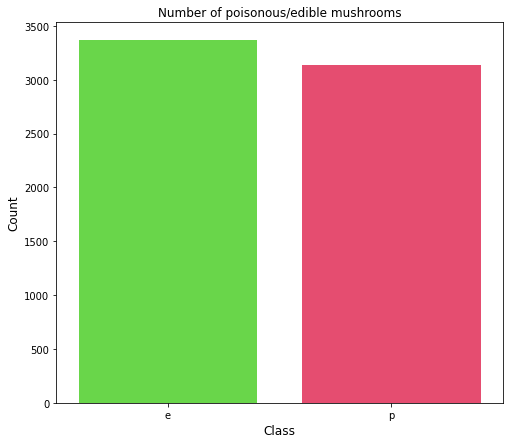

In [10]:
count = df_train['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

## Missing Values 
NaN isn't the only missing value

In [11]:
print('DataSet size:', df_train.shape)
print()
print(df_train.info())

DataSet size: (6499, 23)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 7873 to 7270
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6499 non-null   object
 1   cap-shape                 6499 non-null   object
 2   cap-surface               6499 non-null   object
 3   cap-color                 6499 non-null   object
 4   bruises                   6499 non-null   object
 5   odor                      6499 non-null   object
 6   gill-attachment           6499 non-null   object
 7   gill-spacing              6499 non-null   object
 8   gill-size                 6499 non-null   object
 9   gill-color                6499 non-null   object
 10  stalk-shape               6499 non-null   object
 11  stalk-root                6499 non-null   object
 12  stalk-surface-above-ring  6499 non-null   object
 13  stalk-surface-below-ring  6499 non-null   object


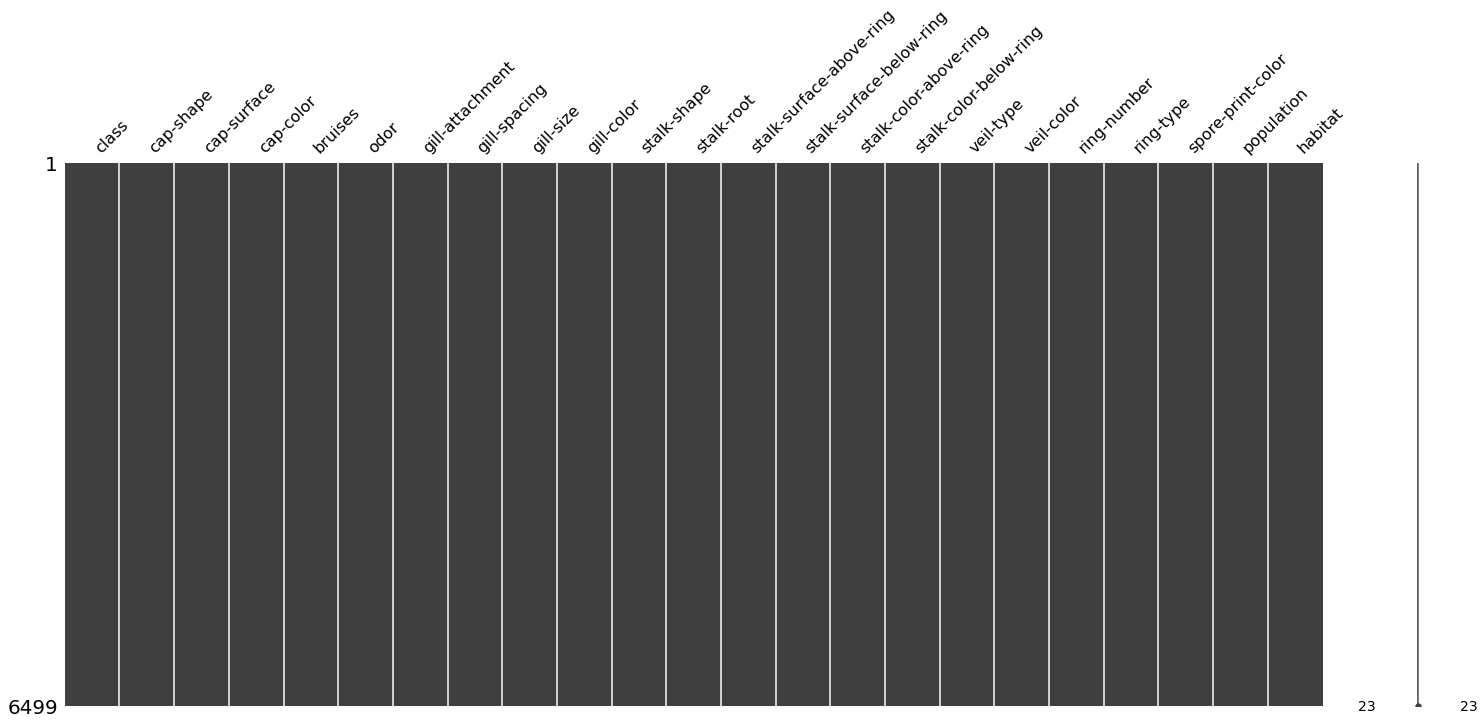

In [12]:
msn.matrix(df_train);

In [13]:
print(df_train['stalk-root'].unique())

['?' 'b' 'c' 'e' 'r']


In [14]:
def replaceMissing(x):
    if(x=='?'):
        return np.NaN
    else:
        return x


#df_train['stalk-root'] = df_train['stalk-root'].map(lambda x : np.NaN if x=='?' else x)
df_train['stalk-root'] = df_train['stalk-root'].map(replaceMissing)
print(df_train['stalk-root'].unique())

[nan 'b' 'c' 'e' 'r']


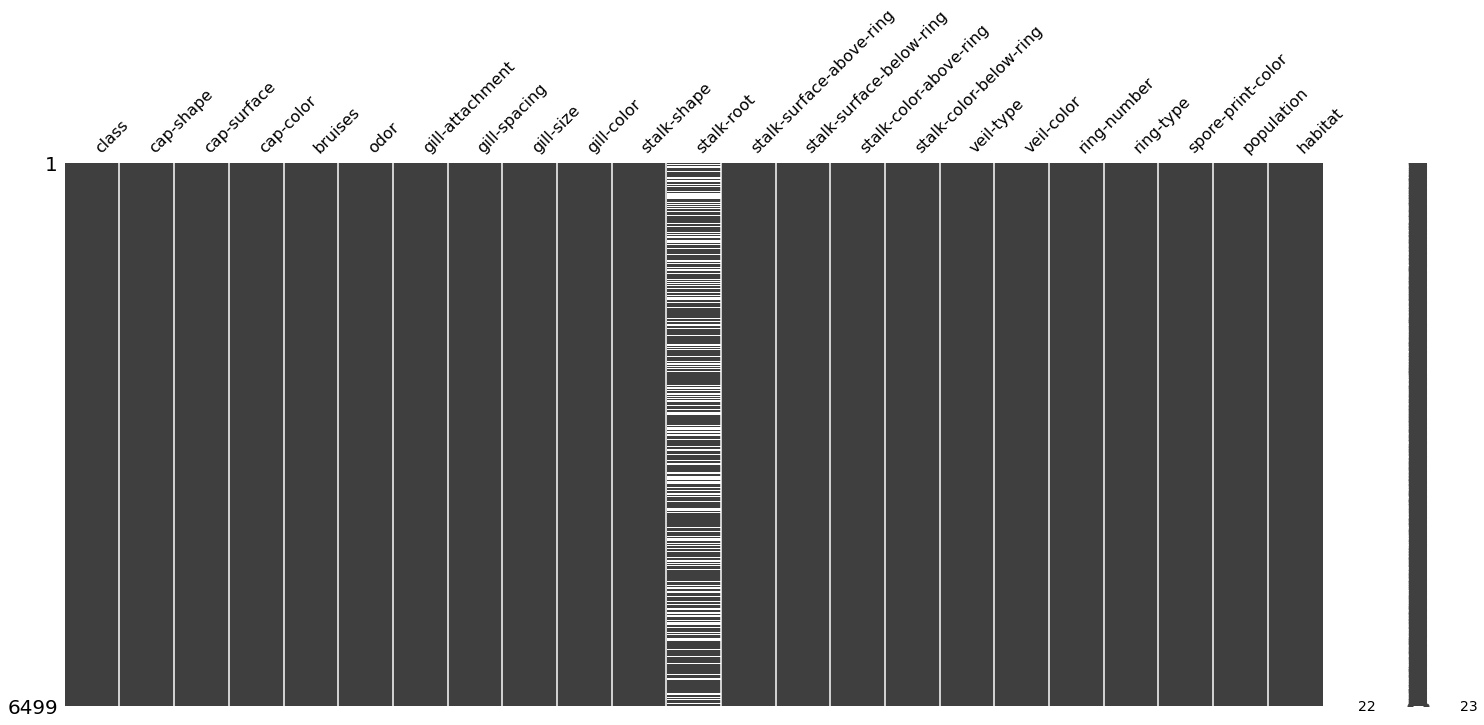

In [15]:
msn.matrix(df_train);

In [16]:
print(("%.2f" % (df_train['stalk-root'].isna().sum()/df_train.shape[0]*100)), '%')


30.88 %


But what about the data we can't see? What do we do if we have missing values there?

## Plotting the data for visualisation

For visualisation purposes ONLY, we encode for the data TEMPORARY using a very simple encoding scheme (ordinal encoding). The data must transformed in a format that allows us to visualise it.

Take the following example/metaphor:<br>
We have some text on a piece of paper. The text is written in reverse. We know how to read the text when it is not reversed, and we also know if we use a mirror, and we reflect the text, we can see it in the correct orientation. So:<br>
"Text seems to be reversed"<br>
"Mirrors can be used to reverse text"<br>
Thus<br>
<a href="https://www.youtube.com/watch?v=M4zlNGBRG5c">"Mirrors can reverse our reverse text to uncover the message"</a>


The plot is a representation of the data (what we see)<br>
The mirror is the transformation you apply to it

<a href="https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9">Here's another example of a such transformation.</a>



In [17]:
# Change the dtypes of the data-frame to 'category'. Panda recognises this data-type, and it improves compatibility within the data.
df_eval = df_train.astype('category')

# We run a default Label encoding over the categorical features (which for this data, it's all the features)
labelencoder=LabelEncoder()
for column in df_eval.columns:
    df_eval[column] = labelencoder.fit_transform(df_eval[column])
df_eval.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,1,3,2,2,0,7,1,0,1,0,1,4,2,1,6,7,0,2,1,0,7,4,0
6515,1,5,2,4,0,2,1,0,1,0,1,4,1,2,7,7,0,2,1,0,7,4,4
6141,1,2,3,2,0,8,1,0,1,0,1,4,2,2,6,7,0,2,1,0,7,4,2
2764,0,2,0,4,1,5,1,0,0,9,1,0,2,2,3,6,0,2,1,4,3,4,0
438,0,0,3,9,1,3,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,3


### Violin Plot
A <a href="https://towardsdatascience.com/violin-plots-explained-fb1d115e023d">Violin Plot</a> show the same information as a <a href="https://en.wikipedia.org/wiki/Box_plot">Box Plot</a>, plus the entire distribution of the data.
<img src="https://miro.medium.com/max/640/1*TTMOaNG1o4PgQd-e8LurMg.webp"/>

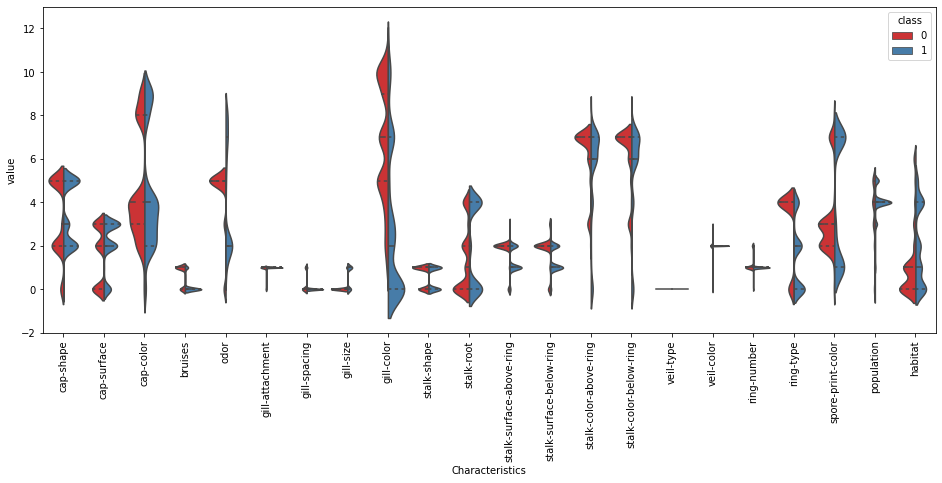

In [18]:
df_div = pd.melt(df_eval, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_features = df_eval.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_features.columns));
plt.savefig("IMG/violinplot.jpg", format='jpg', dpi=900, bbox_inches='tight')
#plt.savefig("IMG/violinplot.png", format='png', dpi=900, bbox_inches='tight')

The violin plot above represents the distribution of the classification characteristics. It allows us to see the distribution of properties per class:

For example, it is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification. 

Also, is this deduction correlating to the real-life phenomena? What do we know about mushrooms? <a href="https://blog.uvahealth.com/2017/02/27/poisonous-mushrooms/">Are there any facts about mushrooms that can help us identify if it's edible or not, without the need of a ML model?</a>

In [19]:
# Let's look at another property, like 'odor'. Does this have any tangent to any real-life phenomena?
pd.DataFrame(data=[df_train['odor'].unique(),df_eval['odor'].unique()])

,0,1,2,3,4,5,6,7,8
0,s,f,y,n,l,p,a,c,m
1,7,2,8,5,3,6,0,1,4


# 

### Box Plot

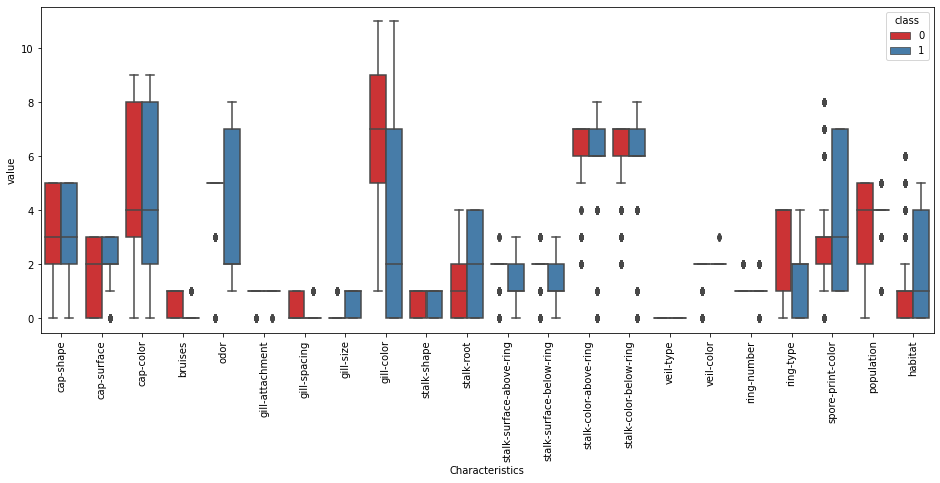

In [20]:
fig, ax = plt.subplots(figsize=(16,6))
p = sns.boxplot(ax = ax, x="Characteristics", y="value", hue="class", data=df_div, palette = 'Set1')
p.set_xticklabels(rotation = 90, labels = list(df_features.columns));
plt.savefig("IMG/boxplot.jpg", format='jpg', dpi=900, bbox_inches='tight')
#plt.savefig("IMG/boxplot.png", format='png', dpi=900, bbox_inches='tight')

On the Box Plot above it is easier to spot outliers, looking at points that are furthest away from the mean.

# 

### Correlation matrix
Correlation measures the strength of a relationship between two variables. <br>
The correlation coefficient expresses the degree of change in one variable as a function of the change in the other variable. In other words, if two properties are strongly correlated, when one changes, we expect the other to change in the same manner.

<a href="https://www.embibe.com/exams/positive-and-negative-correlation/">The correlation between two variables can be positive or negative based on the value of the correlation coefficient.</a>

It might be the case that out of these training features, some features are highly correlated. That may introduce redundancy (or noise) in your feature space, so it can indicate which features to drop and still achieve a good result.

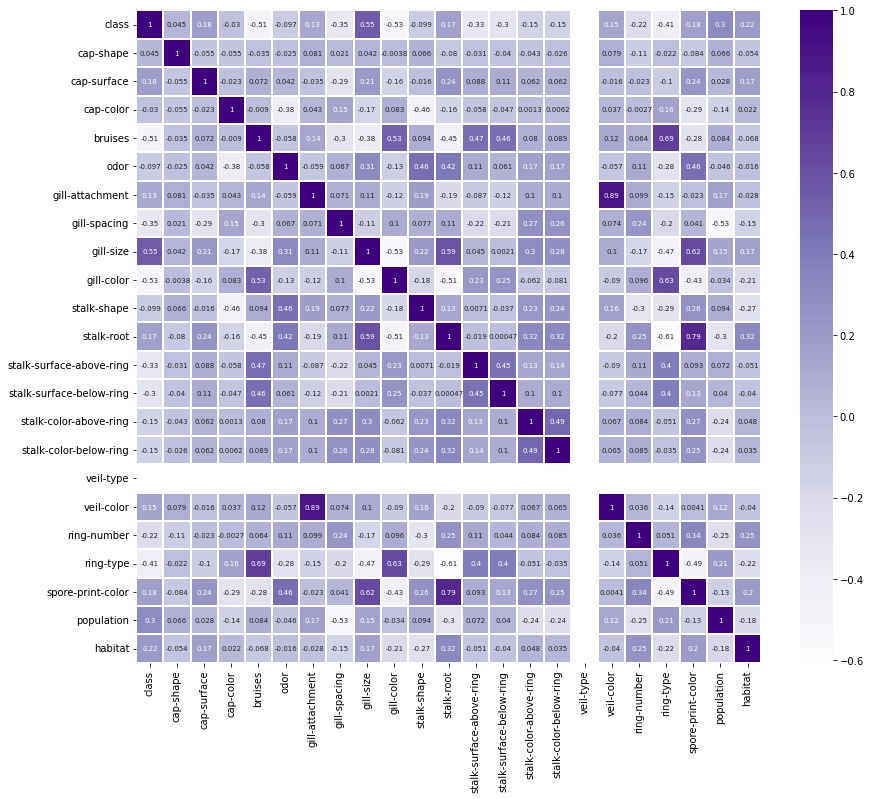

In [21]:
plt.figure(figsize=(14,12))
sns.heatmap(df_eval.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
plt.savefig("IMG/corr.jpg", format='jpg', dpi=900, bbox_inches='tight')
#plt.savefig("IMG/corr.png", format='png', dpi=900, bbox_inches='tight')

We are seeing some really strong corellations between properties and some significant ones between features and the target label.

In [22]:
# For example, 'gill-attachment' and 'veil-color' are strongly correlated.
print(df_train['veil-color'].unique())
print(df_train['gill-attachment'].unique())
df_train[['veil-color','gill-attachment']].sample(25)

['w' 'n' 'o' 'y']
['f' 'a']


,veil-color,gill-attachment
1052,w,f
1458,w,f
5892,w,f
7810,w,f
3894,w,f
6195,w,f
6526,w,f
3481,w,f
300,w,f
4242,w,f


<img src="https://imgs.search.brave.com/noItI-Ca-Vl2_pYuZYY3VBGBx1d1HwCLN1_RhiNziyw/rs:fit:575:478:1/g:ce/aHR0cHM6Ly9pMC53/cC5jb20vd3d3Lm11/c2hyb29tZGlhcnku/Y28udWsvd3AtY29u/dGVudC91cGxvYWRz/LzIwMTEvMDgvZ2ls/bC1hdHRhY2htZW50/cy5naWY.gif"/>

# 


# 

What about correlation between a feature and the target label? Let's take a closer look at 'gil-color'.

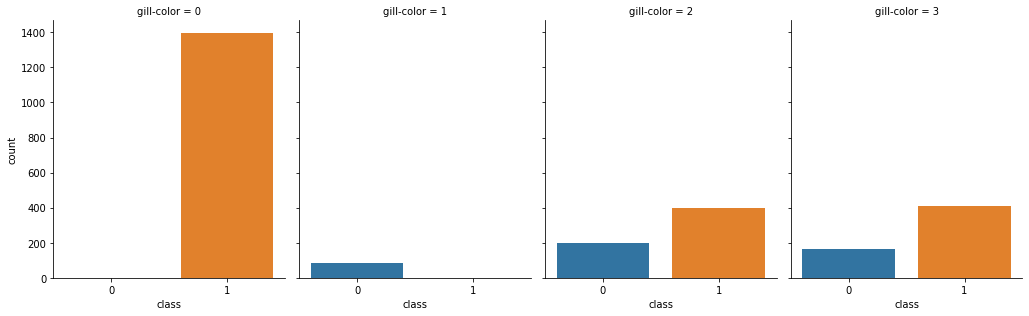

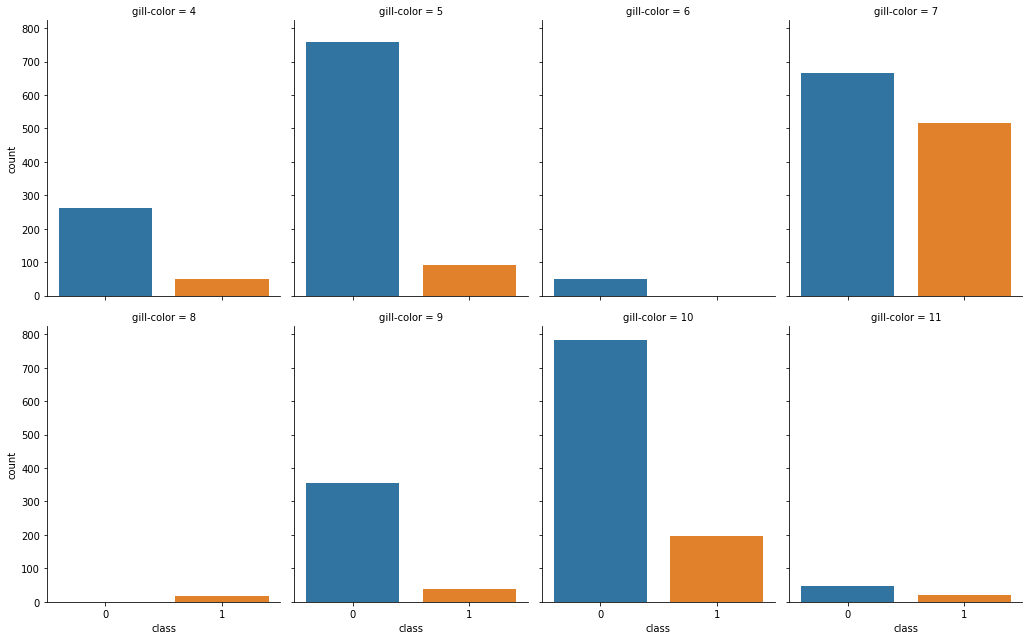

In [23]:
new_var = df_eval[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
new_var=df_eval[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

Sometimes, through visualisation, we can extract meaningful information before we even raech the training stage.
<br>

Here is a similar example in the benchmark Iris data-set, where some class separation is more proeminent.

![Iris Sample](IMG/iris_sample.png)

# Data Pre-Processing
Carrying out necessary transformations

In [24]:
df_train = df_train.astype('category')
df_train.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

# 

## Data Cleaning
Getting rid of what we don't need: Missing Values, Reduntant Values, Outliers

For missing values, let's look back at the Missingno Matrix. <br>
For redundant values, let's look back at the Correlation Matrix.<br>
For outliers, let's look back at the Box Plot

In [25]:
df_train_clean = df_train.drop(['stalk-root', 'gill-attachment', 'veil-type'], axis=1)
df_train_clean.to_csv('df_train_clean.csv', index=False)

# 

## Data encoding

In [26]:
df_train_clean.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2316,e,x,y,e,t,n,c,b,p,t,s,s,w,w,w,o,p,k,v,d
5511,p,x,y,e,f,y,c,n,b,t,k,k,w,p,w,o,e,w,v,l
4718,p,x,f,y,f,f,c,b,g,e,k,k,b,b,w,o,l,h,y,g
2721,e,x,y,e,t,n,c,b,n,t,s,s,g,p,w,o,p,n,y,d
3450,e,f,y,e,t,n,c,b,u,t,s,s,w,w,w,o,p,k,y,d


## One-Hot encoding
with trimming

In [27]:
df_train_oh_encoded = pd.get_dummies(df_train_clean)

In [28]:
df_train_oh_encoded

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7873,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
6515,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6141,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2764,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
438,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5390,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
860,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
7603

In [29]:
df_train_oh_encoded['class'] = df_train_oh_encoded['class_e']
df_train_oh_encoded.drop(['class_e', 'class_p', 'cap-shape_x', 'cap-surface_y', 'cap-color_y', 'bruises_t', 'odor_y', 'gill-spacing_w', 'gill-size_n', 'gill-color_y', 'stalk-shape_t', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_y', 'stalk-color-below-ring_y', 'veil-color_y', 'ring-number_t', 'ring-type_p', 'spore-print-color_y', 'population_v', 'habitat_w'], axis=1, inplace=True)

In [30]:
print(df_train_oh_encoded.shape)
df_train_oh_encoded.to_csv('df_train_oh_encoded.csv', index=False)

(6499, 91)


# 

## Ordinal encoding

In [31]:
df_train_or_encoded = df_train_clean.copy()

labelencoder=LabelEncoder()
for column in df_train_clean.columns:
    df_train_or_encoded[column] = labelencoder.fit_transform(df_train_or_encoded[column])
df_train_or_encoded.to_csv('df_train_or_encoded.csv', index=False)
df_train_or_encoded.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1678,0,2,2,4,0,5,1,0,5,1,2,2,7,7,2,1,0,2,0,1
988,0,5,2,3,0,5,1,0,4,1,2,0,7,7,2,1,0,2,0,1
4550,1,5,3,9,0,2,0,0,7,0,1,1,6,4,2,1,2,1,5,4
1798,1,2,3,8,1,6,0,1,4,0,2,2,7,7,2,1,4,2,4,5
7381,1,2,3,4,0,7,0,1,0,1,1,2,6,6,2,1,0,7,4,2


# 

# 

# Model Training
## with Decision Trees Classifier

# 

## Train-Validation Split

In [32]:
# For each ML algorithm, we need to specify which part of the dataset contains the features ...
X = df_train_or_encoded.drop(['class'], axis=1)
# ... and which is the target 
Y = df_train_or_encoded['class']

# Split dataset again, one big portion for training the model, the other to validate the model
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (5199, 19)
y_train: (5199,)
X_validation: (1300, 19)
y_validation: (1300,)


## Training the model 

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Visualising the produced decision tree

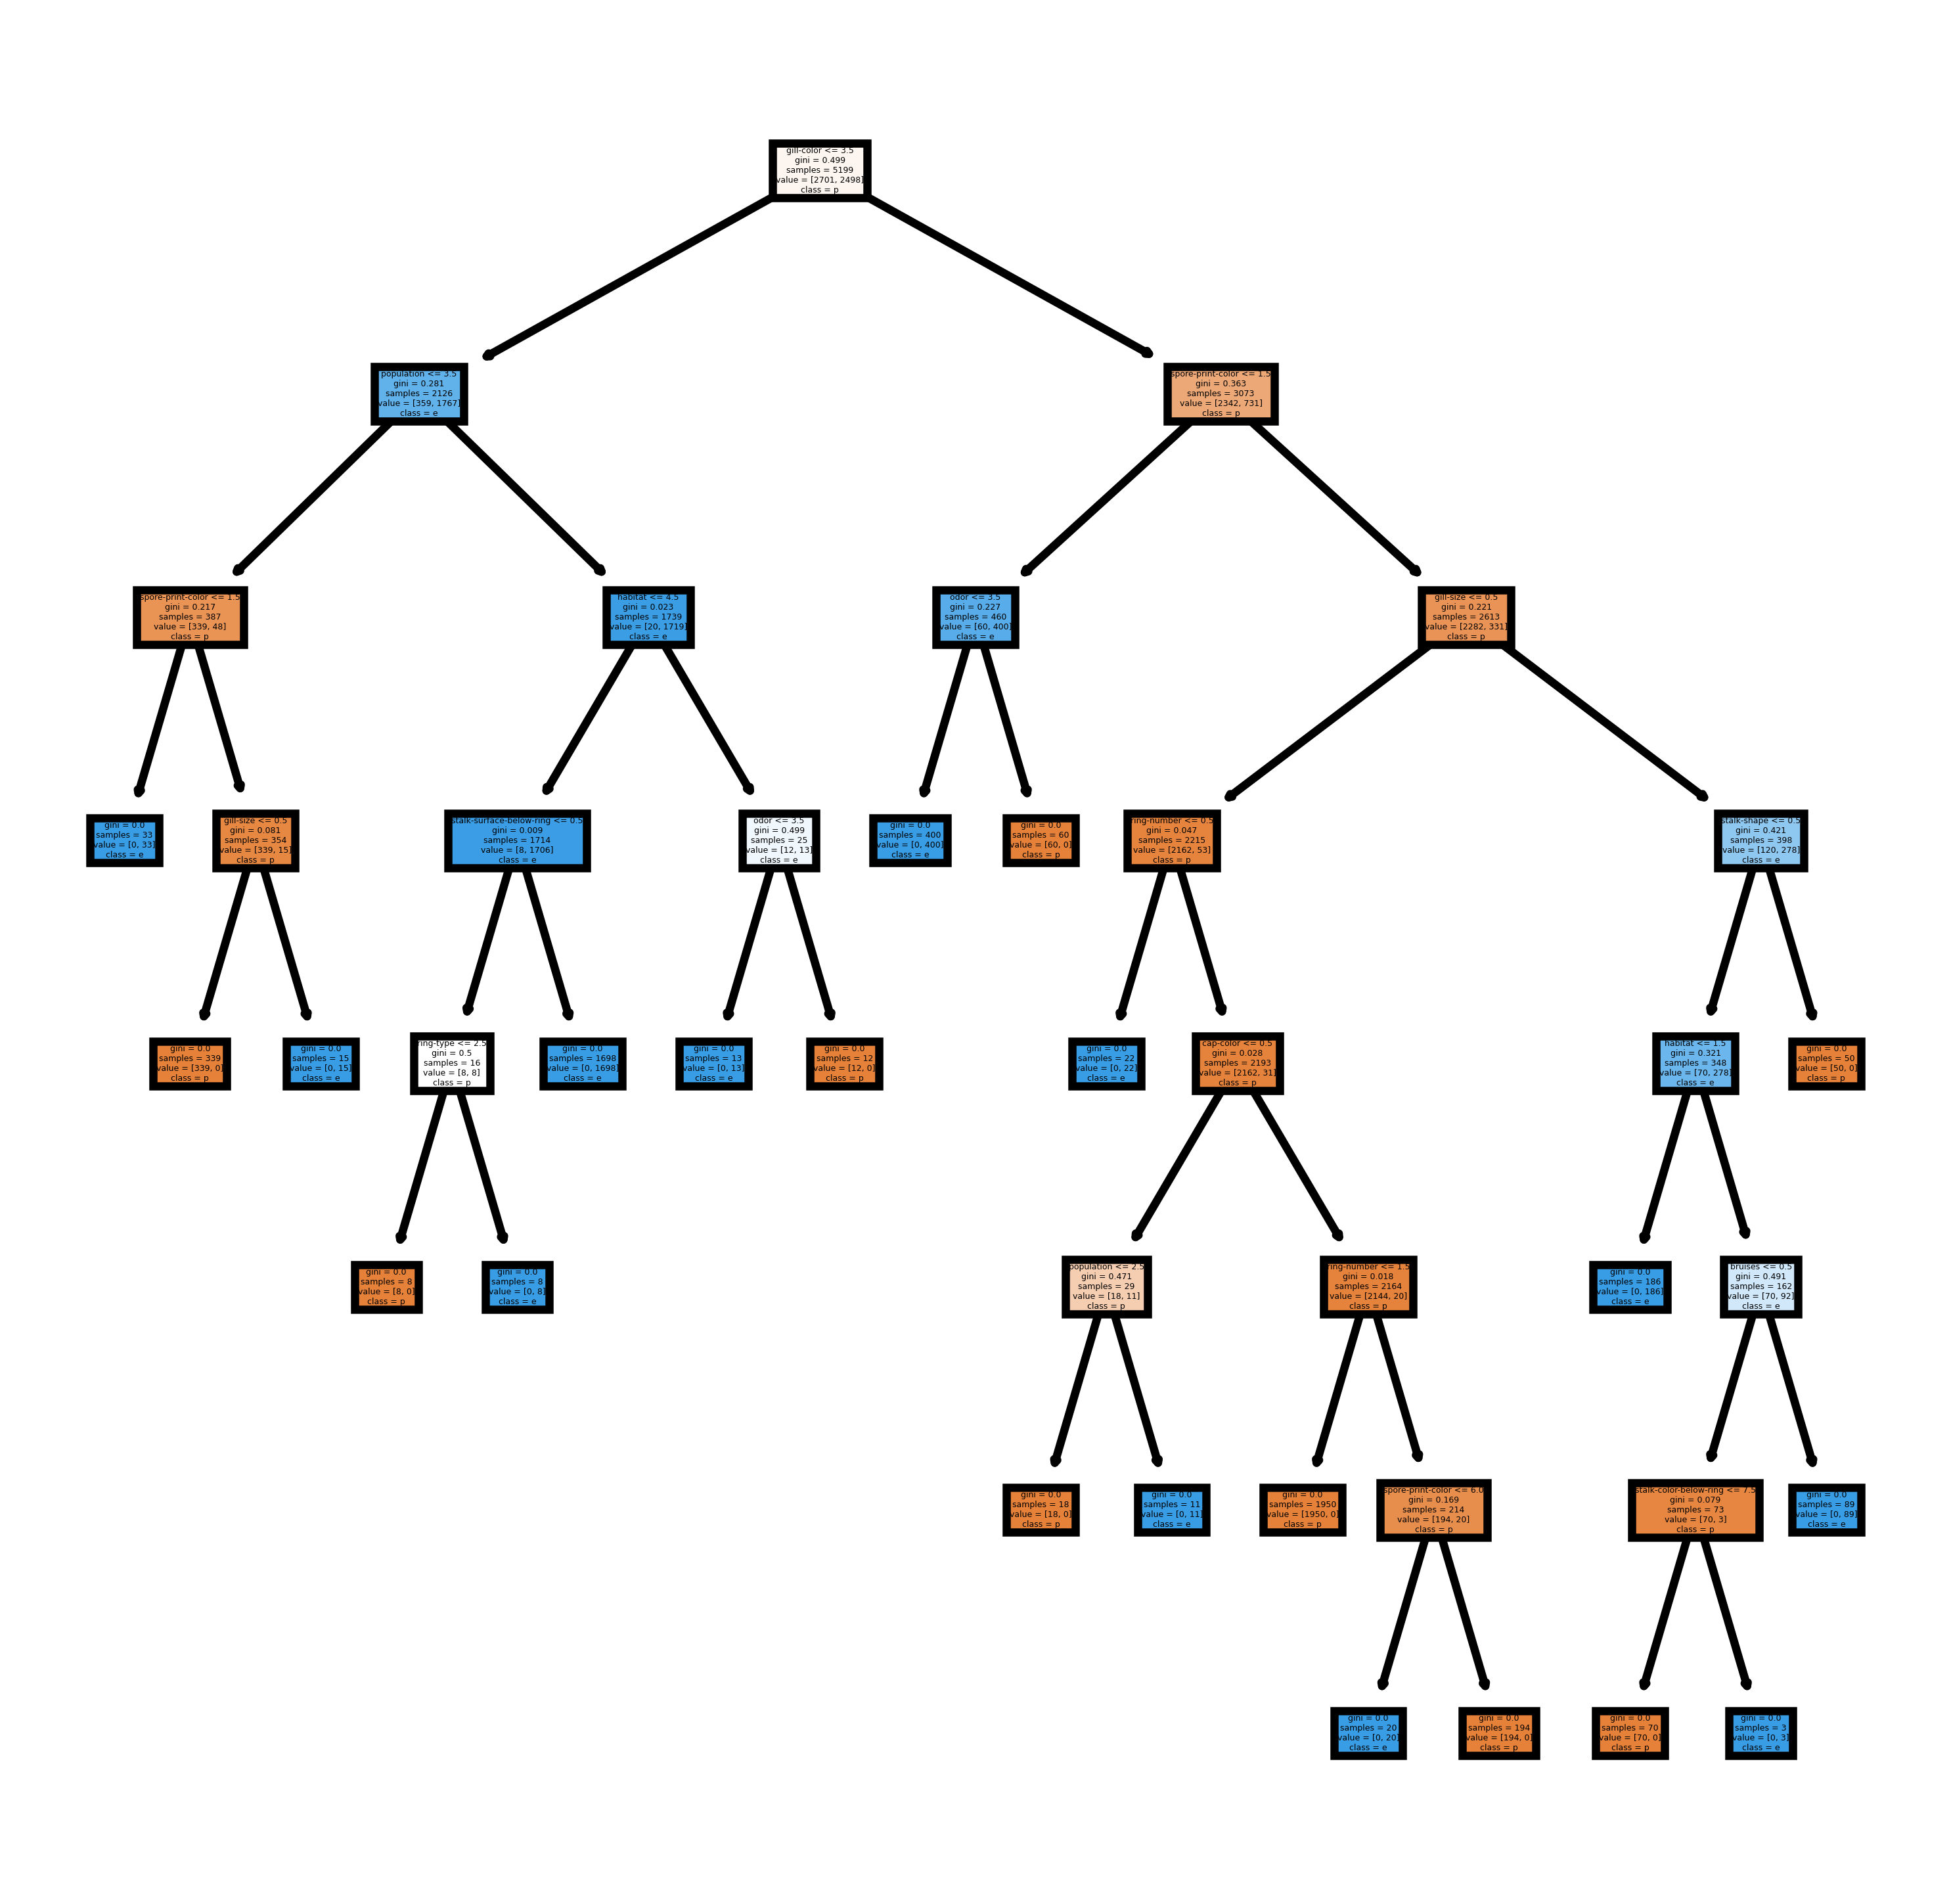

In [34]:
fn = X_train.columns
cn = df_train['class'].unique()

# Setting dpi = 900 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=900)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);

### Feature importance
Drawing a graph showing the feature importance for the trained model. Looking both at the graph below and the three above, what relation can you see?

If you look back at the EDA stage, which assumption that we made about the data are reflected here?

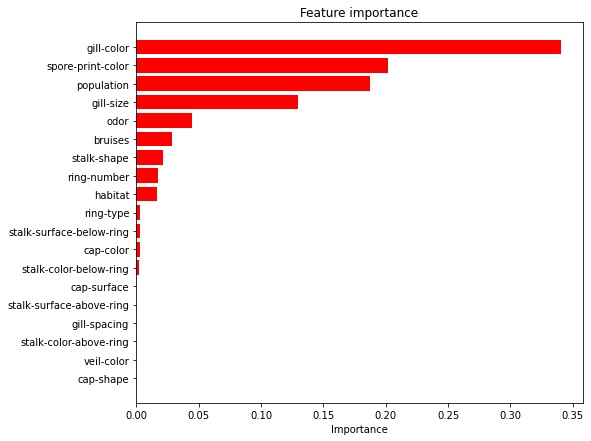

In [35]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("IMG/featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# 

# Validation

Accuracy scores and Confusion Matrix

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

Test Accuracy: 100.0%


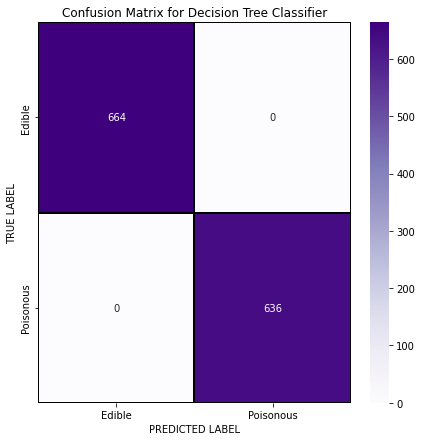

In [36]:
y_pred_validation = clf.predict(X_validation)
print("Decision Tree Classifier report: \n\n", classification_report(y_validation, y_pred_validation))
print("Test Accuracy: {}%".format(round(clf.score(X_validation, y_validation)*100, 2)))

# Confusion matrix
cm = confusion_matrix(y_validation, y_pred_validation)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("IMG/dtcm_validation.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# 

# 

# 

# Testing
With unseen data - Now we see how the model actually performs

# 

## Preparing the test data
First, to be able to fit the data into the model, we need to apply the EXACT SAME Pre-Processing steps as we did on the training data. 

Think of it like this, you are carving a hole into a wall to mount a bar, and the bar must fit perfectly to not be too loose. <br>
The tool you use to cut the hole, is a <b>CIRCLE</b> bit of <b>35MM</b>. Now, given that you have drilled then hole correctly, with the right bit, the you can fit a <b>CIRCULAR</b> bar in the hole with a diameter of <b>35MM</b>. 

Your model is the wall, your training data is the circle bit, training the model is cutting the hole with the bit, the test data is the bar and testing the model is to try and fit the bar in the cut hole. If your test data is not the same shape as your training data, it simply won't fit the algorithm. If your data is not encoded in the same way, then the algorithm will not be able to recognise the links it made out in the training data.<br>

Finally, think as the test results as the error margin in how you've cut the hole, does the bar sit too loose, too tight or not at all?

In [37]:
# No visualisation of any sorts this time. Remember, you cannot see this data, it's like it wasn't produced yet.
df_test = df_test.astype('category')
df_test_clean = df_test.drop(['stalk-root', 'gill-attachment', 'veil-type'], axis=1)
df_test_or_encoded = df_test_clean.copy()

labelencoder=LabelEncoder()
for column in df_test_clean.columns:
    df_test_or_encoded[column] = labelencoder.fit_transform(df_test_or_encoded[column])

## Predicting on test data
We predict on the test data using the SAME MODEL we trained earlier.

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.0%


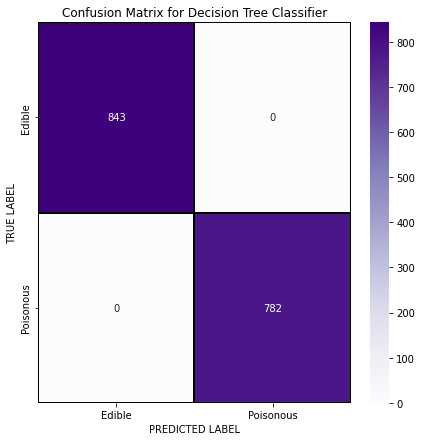

In [38]:
# features
X_test = df_test_or_encoded.drop(['class'], axis=1)
# target
Y_test = df_test_or_encoded['class']

y_pred_validation = clf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(Y_test, y_pred_validation))
print("Test Accuracy: {}%".format(round(clf.score(X_test, Y_test)*100, 2)))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_validation)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("IMG/dtcm_test.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# 

# 

# 

# 

# 

# Appendix

I didn't forget about the one-hot encoded train set

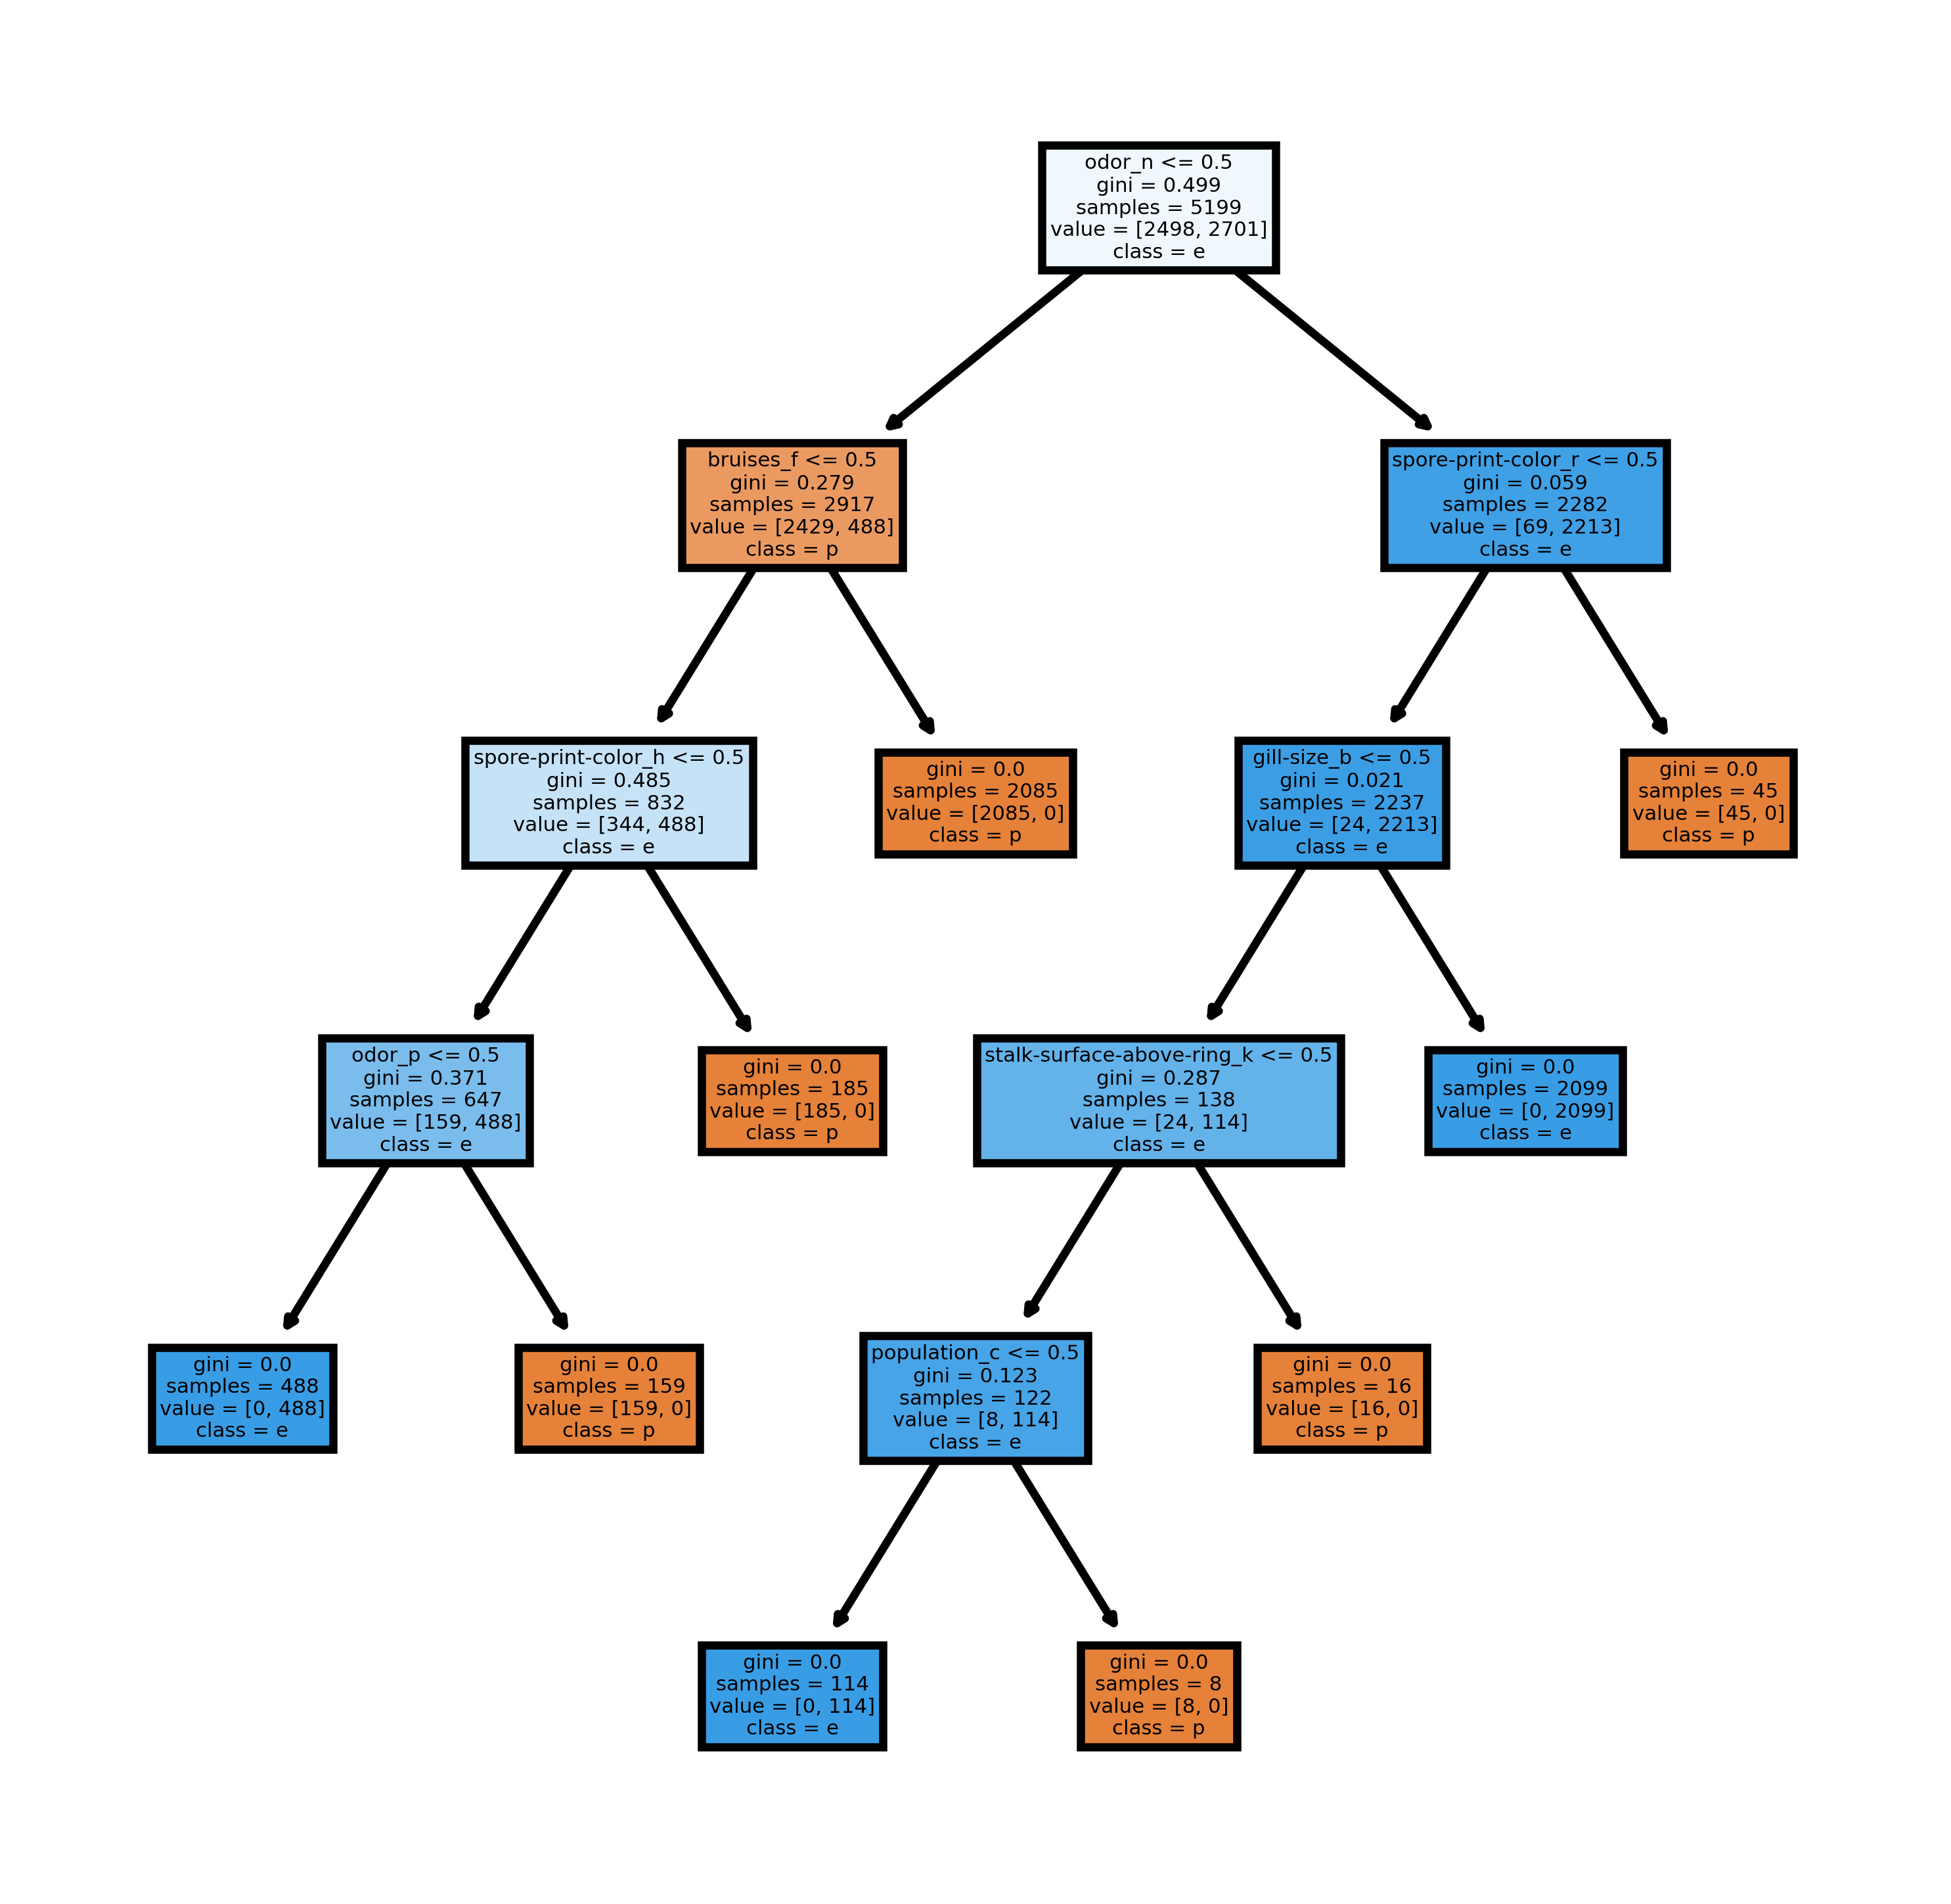

In [39]:
# SPLITTING
X = df_train_oh_encoded.drop(['class'], axis=1)
Y = df_train_oh_encoded['class']
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

# TRAINING
clf_oh = DecisionTreeClassifier() # New model this time btw
clf_oh.fit(X_train, y_train)

# Some visualisation
fn = X_train.columns
cn = df_train['class'].unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=900)
tree.plot_tree(clf_oh,
           feature_names = fn, 
           class_names=cn,
           filled = True);

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       636
           1       1.00      1.00      1.00       664

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

Test Accuracy: 100.0%


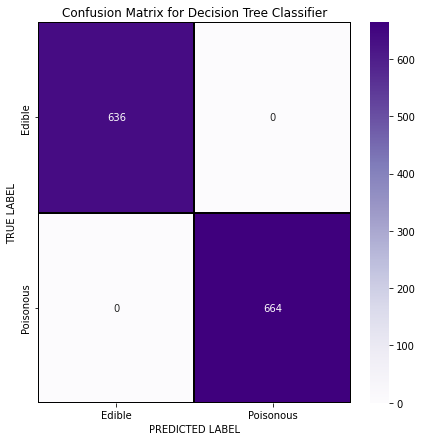

In [40]:
# VALIDATION
y_pred_validation = clf_oh.predict(X_validation)
print("Decision Tree Classifier report: \n\n", classification_report(y_validation, y_pred_validation))
print("Test Accuracy: {}%".format(round(clf_oh.score(X_validation, y_validation)*100, 2)))

cm = confusion_matrix(y_validation, y_pred_validation)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()